In [3]:
# Let's import python libraries First

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [13]:
# import csv file
df = pd.read_csv('Sales_Data.csv', encoding= 'unicode_escape')

In [6]:
#Check Number of rows and Columns
df.shape

(11257, 13)

In [7]:
#To see the imported data
df.head(10)  # Show Top 5 Rows 

,User_ID,Cust_name,Product_ID,Age,Age Group,Gender,State,Zone,Zipcode,Profession,Product_Category,Orders,Amount
0,1002903.0,Anvi,P00125942,27.0,26-35,Female,Maharashtra,West,NaN,Healthcare,Sports,4.0,20500.0
1,1000732.0,Shanta,P00110942,34.0,26-35,Female,Andhra Pradesh,South,NaN,Govt,Sports,2.0,25360.0
2,1001990.0,Sheetal,P00118542,16.0,0-17,Female,Uttar Pradesh,Central,NaN,Automobile,Health,4.0,29350.0
3,1001425.0,Virendra,P00237842,16.0,0-17,M,Karnataka,South,NaN,Construction,Clothing,6.0,23500.0
4,1000588.0,Vishal,P00057942,28.0,26-35,M,Gujarat,West,NaN,Food Processing,Electronics,4.0,23870.0
5,1000588.0,Suuraj,P00057942,28.0,26-35,M,Himachal Pradesh,Northern,NaN,Food Processing,Electronics,3.0,23860.0
6,1001132.0,Sejal,P00018042,25.0,18-25,Female,Uttar Pradesh,Central,NaN,Lawyer,Health,2.0,23841.0
7,1002092.0,Shivangi,P00273442,61.0,55+,Female,Maharashtra,West,NaN,IT Sector,Health,3.0,26000.0
8,1003224.0,Kushal,P00205642,35.0,26-35,M,Uttar Pradesh,Central,NaN,Govt,Beauty,4.0,23809.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Field details and Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11257 entries, 0 to 11256
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11245 non-null  float64
 1   Cust_name         11245 non-null  object 
 2   Product_ID        11245 non-null  object 
 3   Age               11245 non-null  float64
 4   Age Group         11245 non-null  object 
 5   Gender            11245 non-null  object 
 6   State             11245 non-null  object 
 7   Zone              11245 non-null  object 
 8   Zipcode           0 non-null      float64
 9   Profession        11245 non-null  object 
 10  Product_Category  11245 non-null  object 
 11  Orders            11245 non-null  float64
 12  Amount            11245 non-null  float64
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


## Let's Start Data Cleaning

In [ ]:
#Deleting blank column
df.drop(['Zipcode'], axis=1, inplace=tr)

In [18]:
#List of Columns Available
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Age', 'Age Group', 'Gender',
       'State', 'Zone', 'Profession', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [23]:
#check for null values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Age                 0
Age Group           0
Gender              0
State               0
Zone                0
Profession          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [26]:
# drop null values
df.dropna(how='all', inplace=True)

In [25]:
df.shape

(11245, 12)

In [26]:
#replace value of Gender Column
df['Gender'] = df['Gender'].replace('M', 'Male')


In [27]:
#View only Male Gender data
df[df['Gender'] == 'Male']

,User_ID,Cust_name,Product_ID,Age,Age Group,Gender,State,Zone,Zipcode,Profession,Product_Category,Orders,Amount
3,1001425.0,Virendra,P00237842,16.0,0-17,Male,Karnataka,South,NaN,Construction,Clothing,6.0,23500.0
4,1000588.0,Vishal,P00057942,28.0,26-35,Male,Gujarat,West,NaN,Food Processing,Electronics,4.0,23870.0
5,1000588.0,Suuraj,P00057942,28.0,26-35,Male,Himachal Pradesh,Northern,NaN,Food Processing,Electronics,3.0,23860.0
8,1003224.0,Kushal,P00205642,35.0,26-35,Male,Uttar Pradesh,Central,NaN,Govt,Beauty,4.0,23809.0
11,1003829.0,Harsh,P00200842,34.0,26-35,Male,Delhi,Central,NaN,Banking,Health,2.0,23770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11249,1005446.0,Sheetal,P00297742,53.0,51-55,Male,Gujarat,West,NaN,Healthcare,Health,3.0,382.0
11250,1005446.0,Sheetal,P00297742,53.0,51-55,Male,Madhya Pradesh,Central,NaN,Healthcare,Health,2.0,382.0
11252,1000695.0,Manning,P00296942,19.0,18-25,Male,Maharashtra,West,NaN,Chemical,Health,1.0,370.0
11253,1004089.0,Reichenbach,P00171342,33.0,26-35,Male,Haryana,Northern,NaN,Healthcare,Health,5.0,367.0


## Exploratory Data Analysis

In [18]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Zipcode,Orders,Amount
count,1.124500e+04,11245.000000,0.0,11245.000000,11245.000000
mean,1.003004e+06,35.415651,NaN,3.500311,9461.934237
std,1.716207e+03,12.756369,NaN,1.713706,5234.426634
min,1.000001e+06,12.000000,NaN,1.000000,188.000000
25%,1.001492e+06,27.000000,NaN,2.000000,5443.000000
50%,1.003065e+06,33.000000,NaN,4.000000,8109.000000
75%,1.004429e+06,43.000000,NaN,5.000000,12683.000000
max,1.006040e+06,92.000000,NaN,6.000000,29350.000000


In [28]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11245.000000,11245.000000,11245.000000
mean,35.415651,3.500311,9461.934237
std,12.756369,1.713706,5234.426634
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,4.000000,8109.000000
75%,43.000000,5.000000,12683.000000
max,92.000000,6.000000,29350.000000


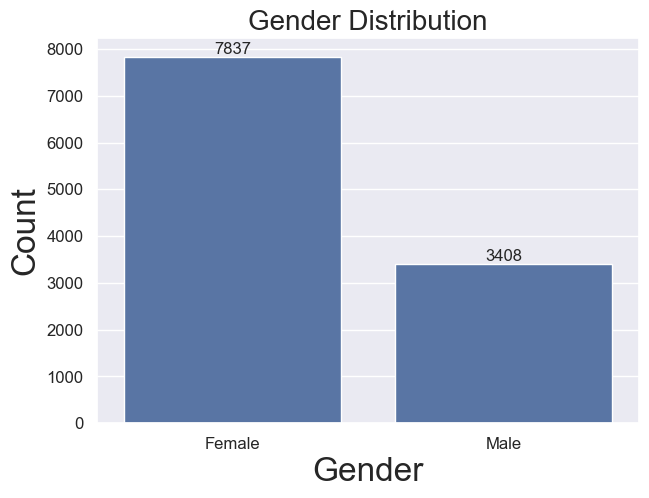

In [56]:
# Total Transactions count by Gender Wise in Bar Chart
ax = sns.countplot(x = 'Gender', data = df)

# Set Title and Labels with Font Size
for bars in ax.containers:
    ax.bar_label(bars)
    ax.set_title('Gender Distribution', fontsize=20)   # Chart Title
    ax.set_xlabel('Gender', fontsize=24)               # X - Axis Label
    ax.set_ylabel('Count', fontsize=24)                # Y - Axis Label 
    ax.tick_params(axis='both', labelsize=12)          # Axis Parameters
plt.show()
    

In [ ]:
# 2 . Gender wise distribution in Pie Chart

In [90]:
#Total Transactions Count by Gender wise
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
Female    7837
Male      3408
Name: count, dtype: int64


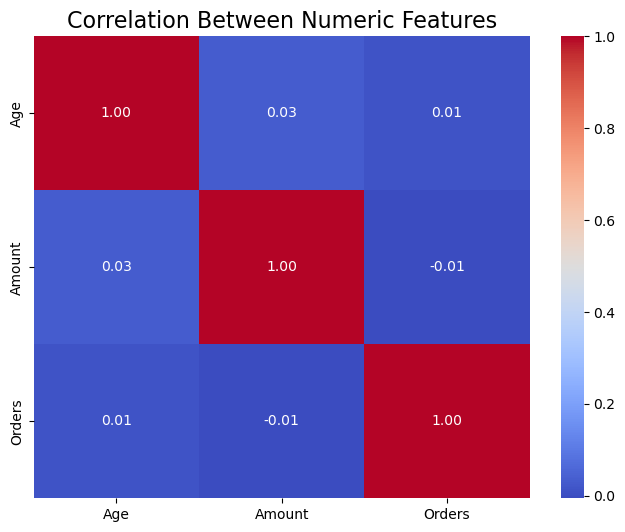

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Amount', 'Orders']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numeric Features', fontsize=16)
plt.show()


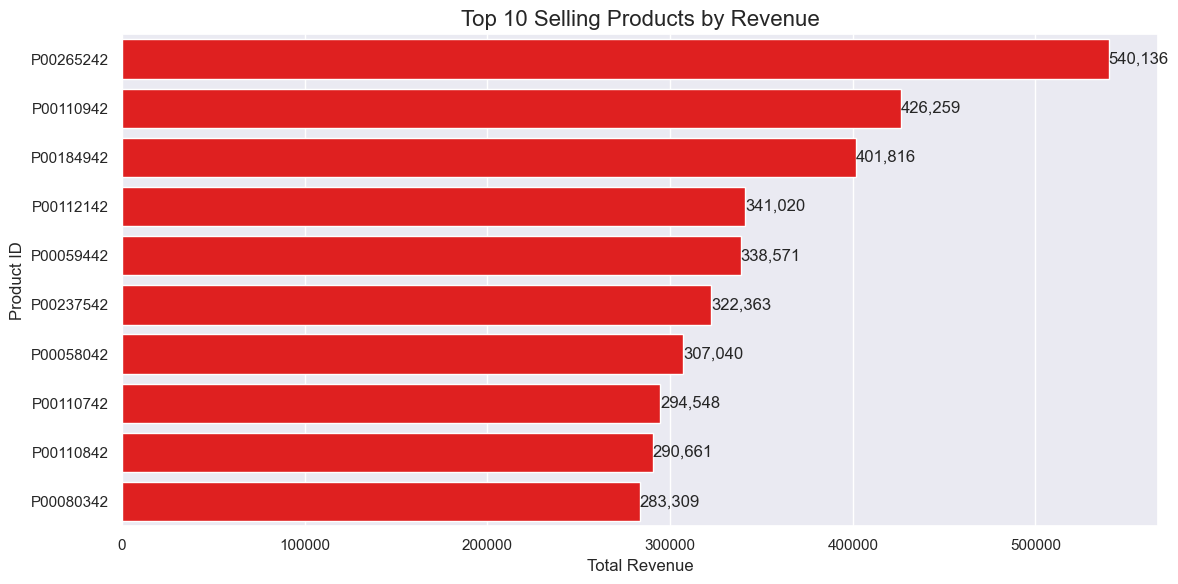

In [62]:
# Group by product and sum the amount, then sort
top_products = df.groupby('Product_ID')['Amount'].sum().sort_values(ascending=False).head(10)

# Create only one figure
plt.figure(figsize=(12, 6))

# Create the plot and save the axes object
ax = sns.barplot(x=top_products.values, y=top_products.index, color='red')
# Removed the conflicting parameters (hue and palette) since we're using a single color

# Add data labels
for p in ax.patches:
    width = p.get_width()
    ax.text(
        width,  # x position (at the end of the bar)
        p.get_y() + p.get_height()/2,  # y position (middle of the bar)
        f'{width:,.0f}',  # Proper number formatting
        ha='left', va='center'  # Alignment for better visibility
    )
    
plt.title('Top 10 Selling Products by Revenue', fontsize=16)
plt.xlabel('Total Revenue')
plt.ylabel('Product ID')

# Only call plt.show() once at the end
plt.tight_layout()  # Added to ensure everything fits nicely
plt.show()






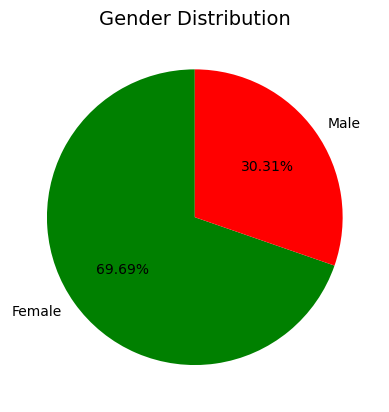

In [43]:
#Total Transactions Count by Gender wise in Pie Chart
gender_counts = df['Gender'].value_counts()

plt.pie(
    gender_counts,                       # Data (counts)
    labels=gender_counts.index,          # Labels (e.g., Male, Female)
    colors=['green','red'],
    autopct='%.2f%%',                    # Show percentages (2 decimal place)
    startangle=90,                       # Rotate for better orientation
)
# Add a title
plt.title('Gender Distribution', fontsize=14)
plt.show()


In [104]:
df.groupby('Gender', as_index=False)['Amount'].sum()

,Gender,Amount
0,Female,74461610.49
1,Male,31937840.00


In [33]:
Gen_Wise_Sales = df.groupby('Gender', as_index=False)['
Amount'].sum().sort_values(by='Amount', ascending=False)
print(Gen_Wise_Sales)

   Gender       Amount
0  Female  74461610.49
1    Male  31937840.00


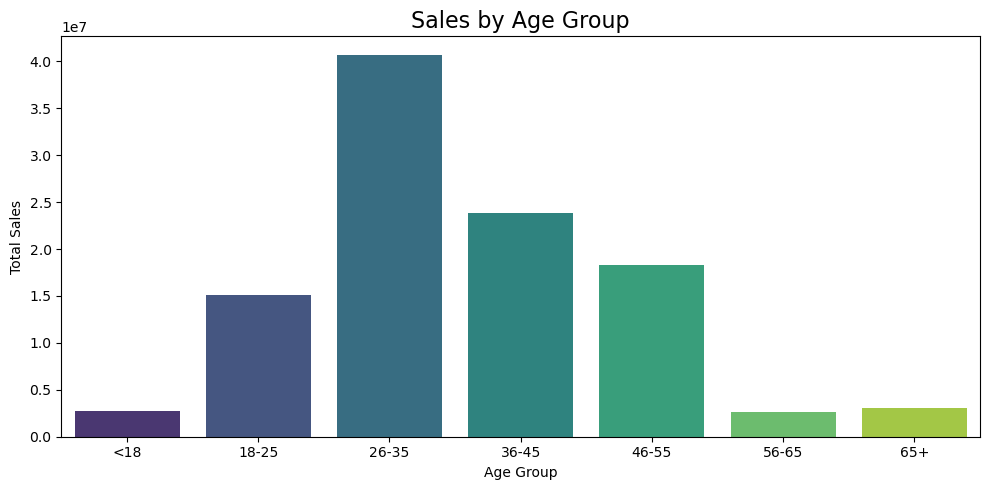

In [37]:
# Sales Distribution by Age Group

# Create Age Groups
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Clear any previous plots to avoid duplicates
plt.clf()  # Clear the current figure
plt.close('all')  # Close all figures

# Plot with modified parameters
plt.figure(figsize=(10, 5))
# Changed 'legend' from string 'False' to boolean False
# Changed palette to 'viridis' for different colors
# Added width=0.8 to make bars wider
sns.barplot(x='Age Group', y='Amount', hue='Age Group', data=df, 
           estimator=sum, errorbar=None, 
           palette='viridis',  # You can try other palettes like 'plasma', 'magma', etc.
           legend=False,  # Corrected from 'False' string to False boolean
           width=0.8)  # Make bars wider to fill more space

plt.title('Sales by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Total Sales')

# Adjust layout to use space efficiently
plt.tight_layout()
plt.show()

Conclusion : Male sales are higher than female sales

### --> Age group wise total transactions

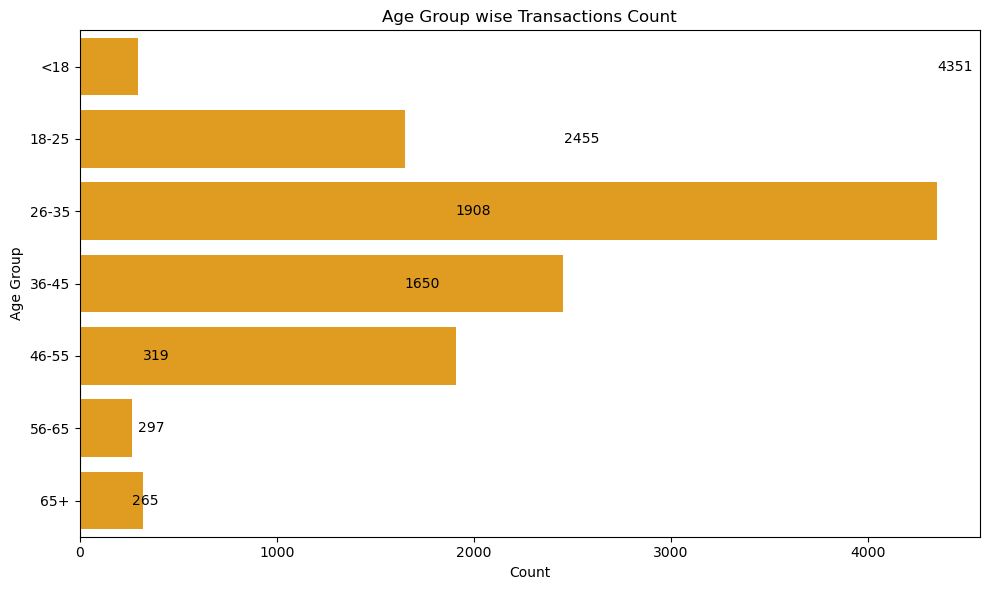

In [48]:
#Step 1 - Age group wise transactions count (Sorting)

ge_group_counts = df['Age Group'].value_counts().sort_values(ascending=False)

#Step 2 - Use Ordered categories for sorting in countplot
sns_order = age_group_counts.index

#Step 3 - Create a figure with appropriate size
plt.figure(figsize=(10, 6))

#Step 4 - Create horizontal bar chart (to fill entire rows)
ax = sns.barplot(
    x=age_group_counts.values,  # Count values
    y=age_group_counts.index,   # Age group categories
    color='orange',              # Color for all bars
    orient='h'                  # Horizontal orientation to show as rows
)

#Step 5 - Add data labels to the end of each bar
for i, v in enumerate(age_group_counts.values):
    ax.text(v + 0.5, i, str(v), va='center')

#Step 6 - Set labels and title
plt.xlabel('Count')
plt.ylabel('Age Group')
plt.title('Age Group wise Transactions Count')

plt.tight_layout()
plt.show()




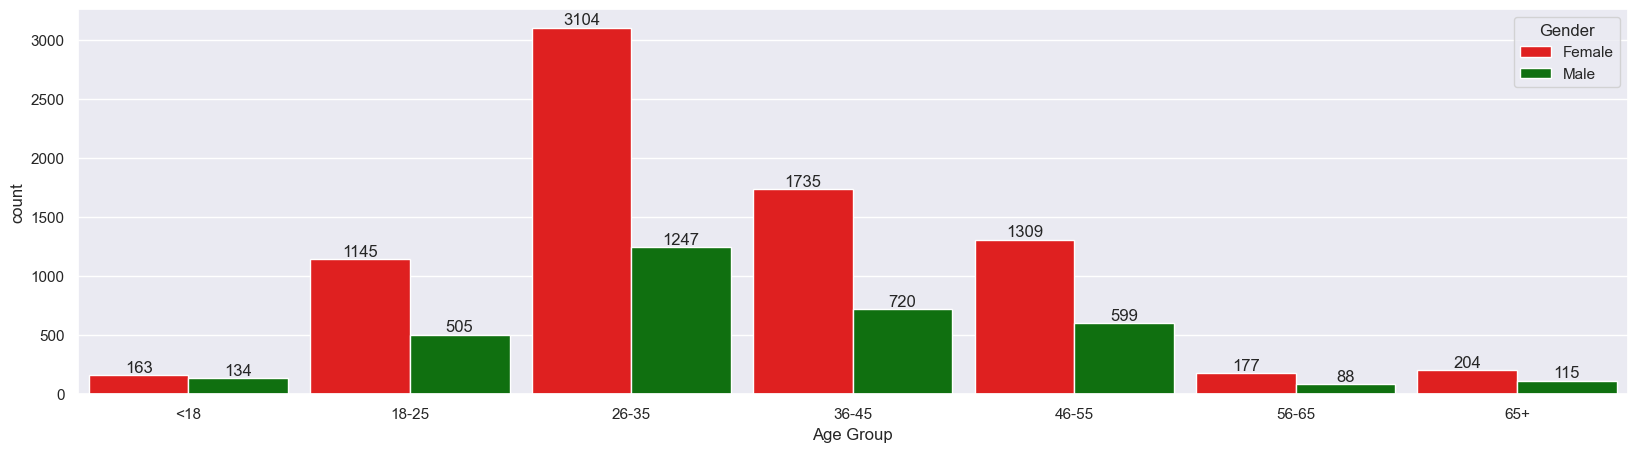

In [69]:
#Age group and Gender wise Transactions distribution

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender',palette=['red','green'],width=0.9)

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5280\199220065.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)


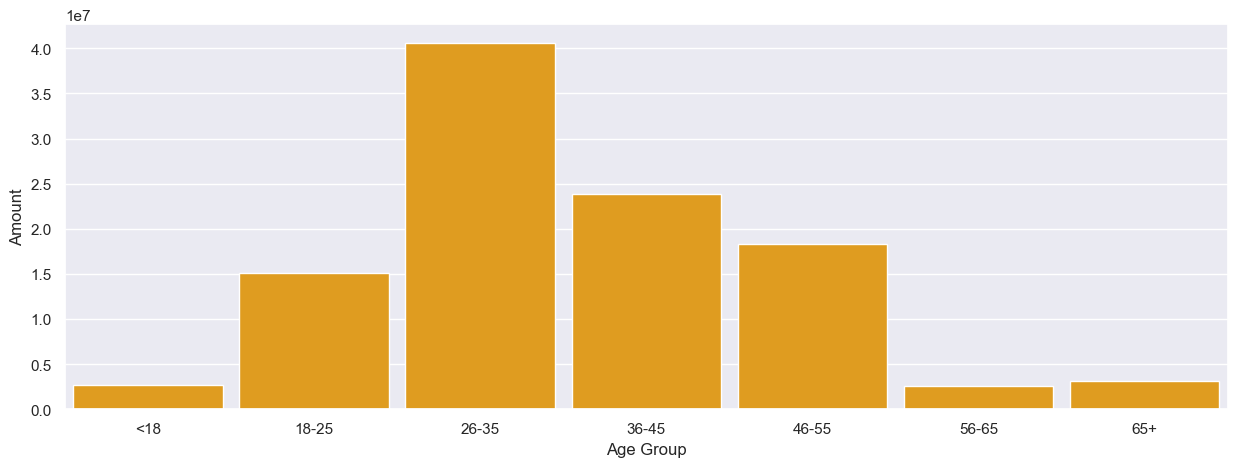

In [75]:
#  Age Group wise Total Amount
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age,color='orange',width=0.9)

plt.show()

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

### --> State wise analysis

In [131]:
order_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)
print(order_state)

             State  Orders
14   Uttar Pradesh  6669.0
10     Maharashtra  5328.0
7        Karnataka  4506.0
2            Delhi  3893.0
9   Madhya Pradesh  3217.0


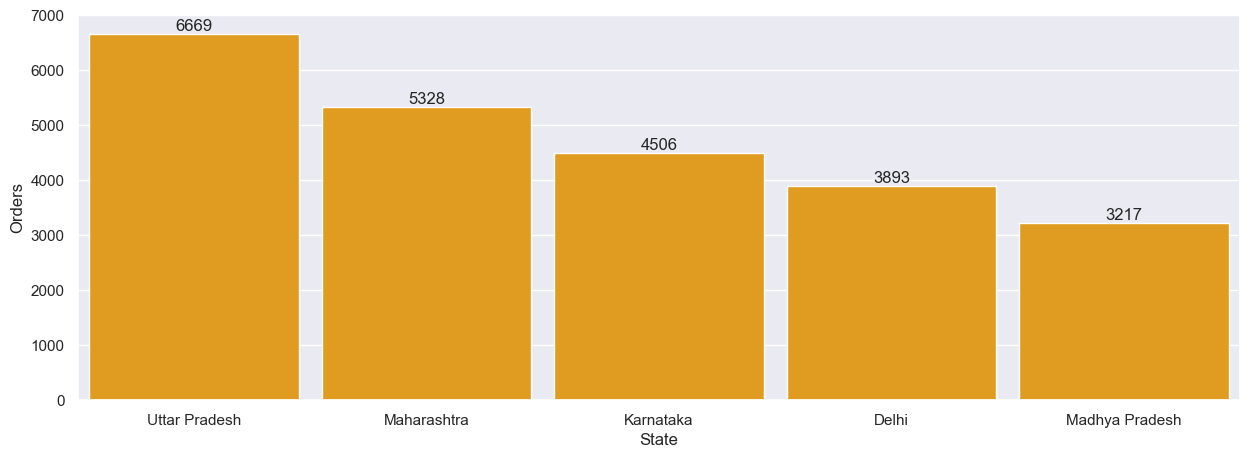

In [73]:
# Order wise Top 5 state
order_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

#sns.set(rc={'figure.figsize':(15,5)})
ax = sns.barplot(data = order_state, x = 'State',y= 'Orders',color='orange',width=0.9)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

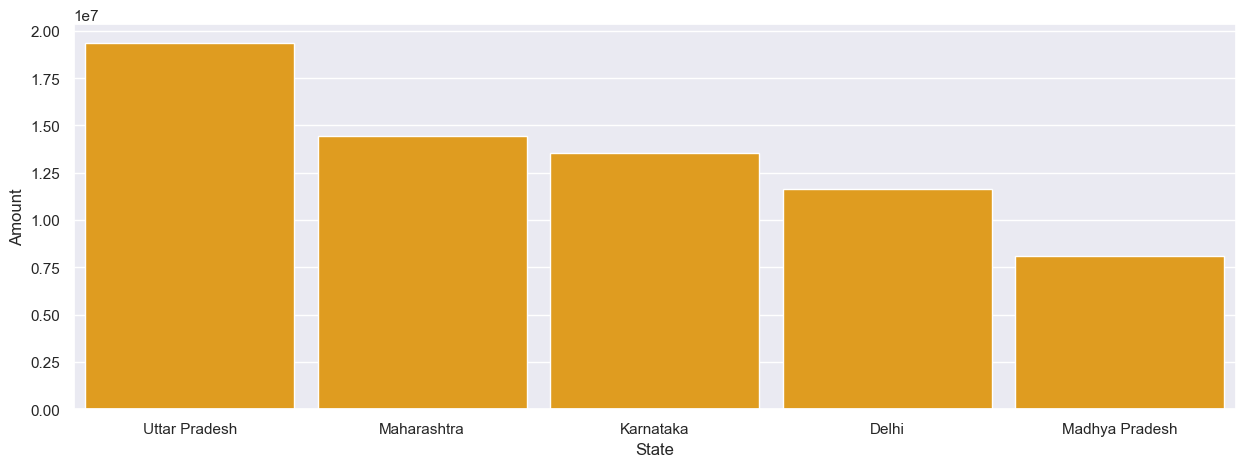

In [72]:
# Amount Wise top 5 state 

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount',color='orange',width=0.9)
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


### --> Product_Category Analysis

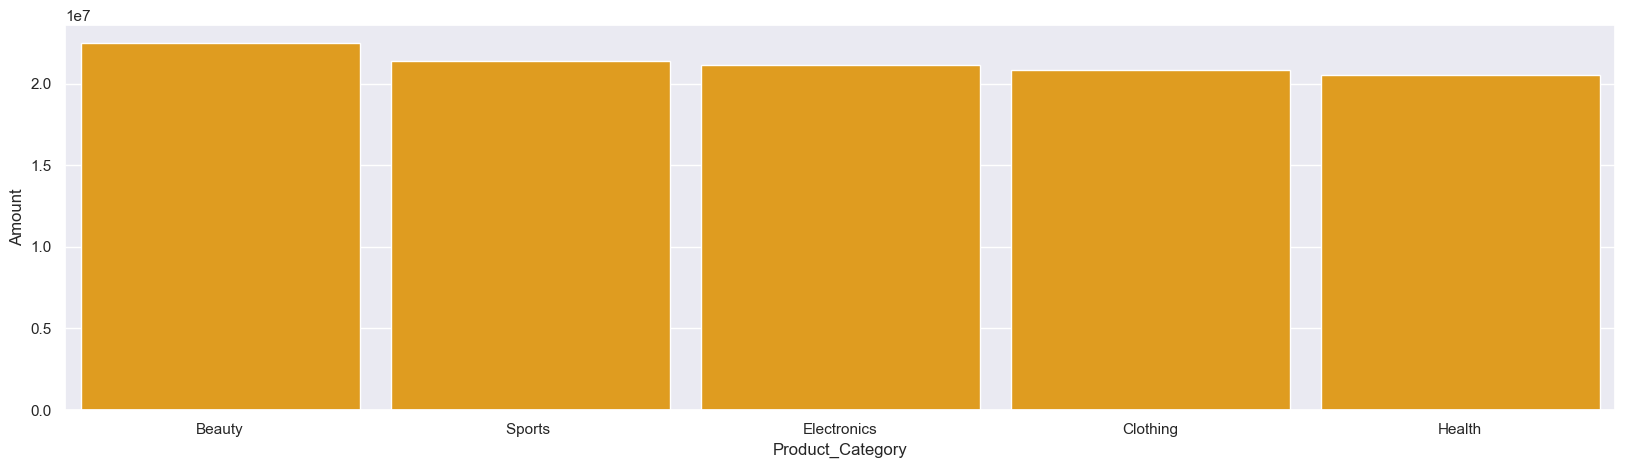

In [71]:
#Amount wise Product Category in Bar Chart
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount',color='orange',width=0.9)

plt.show()

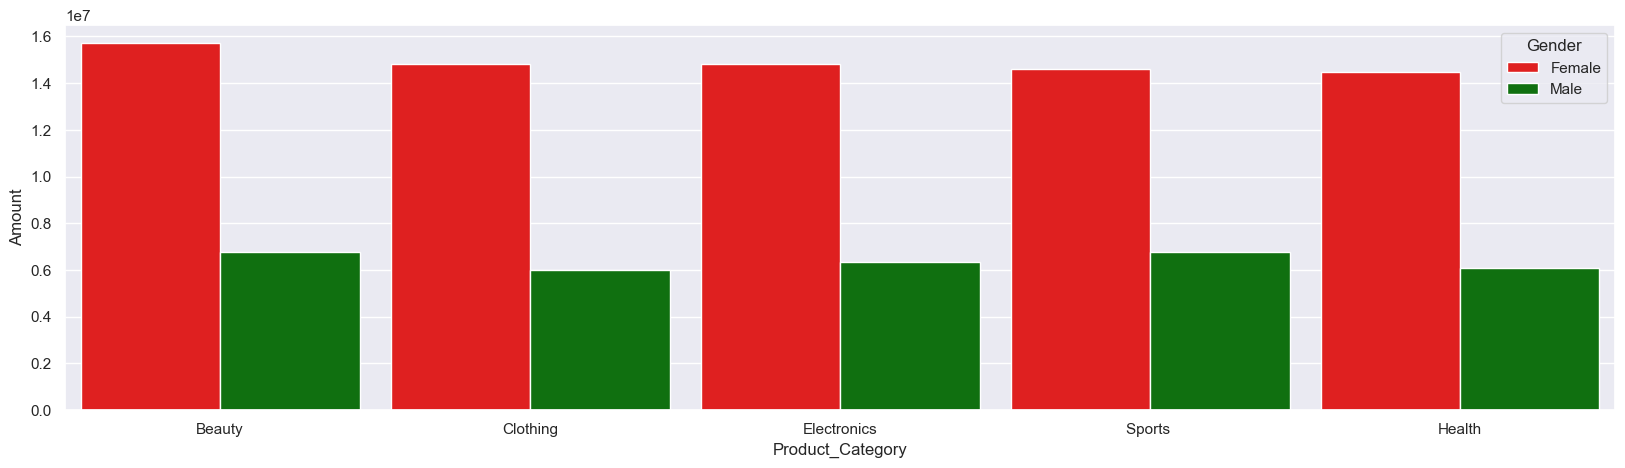

In [68]:
#Product category and Gender wise Transactions count
sales_pro = df.groupby(['Product_Category', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(data = sales_pro, x = 'Product_Category',y= 'Amount', hue='Gender',palette=['red','green'],width=0.9)

plt.show()


*From above graphs we can see that most of the buyers are Female 

### --> Profession wise Analysis

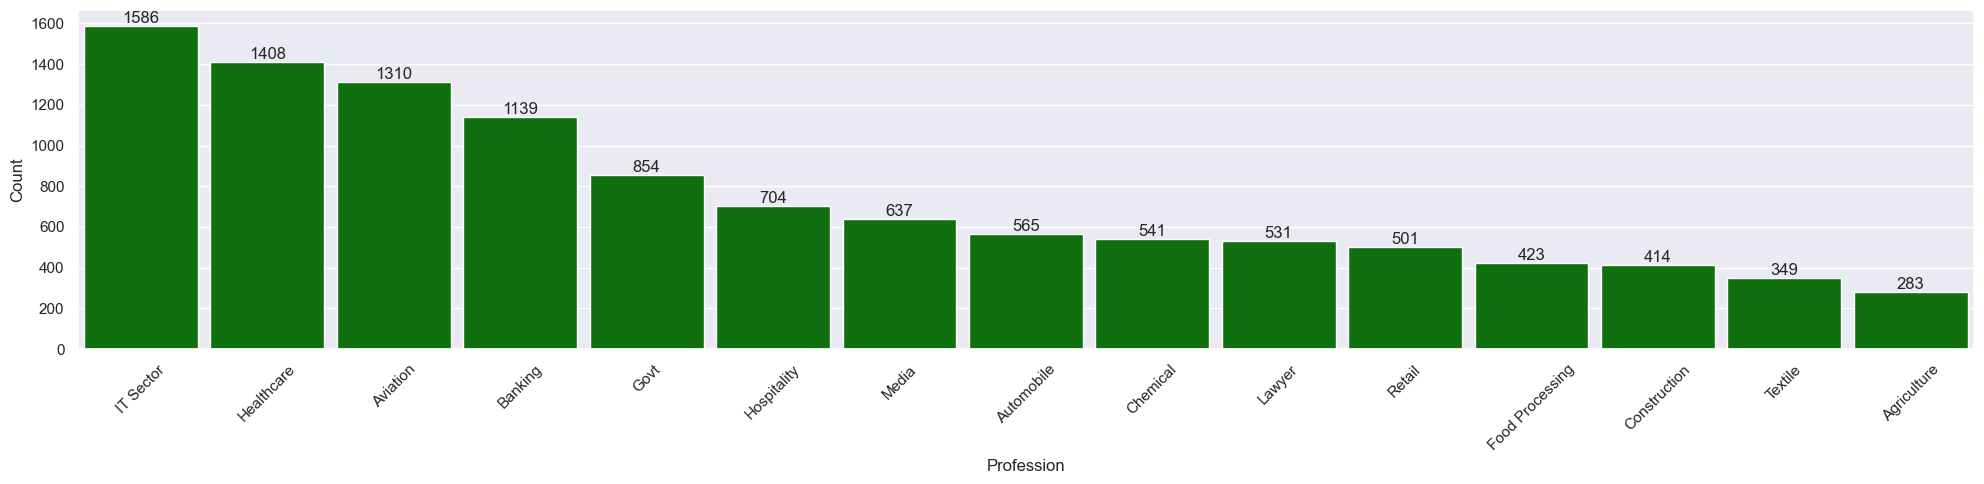

In [65]:
# Profession wise Transactions count

# Count the occurrences of each profession and sort
profession_counts = df['Profession'].value_counts().reset_index()
profession_counts.columns = ['Profession', 'Count']  # Rename columns for clarity

# Create a barplot with sorted data
ax = sns.barplot(data=profession_counts, x='Profession', y='Count',color='Green',width=0.9)

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()

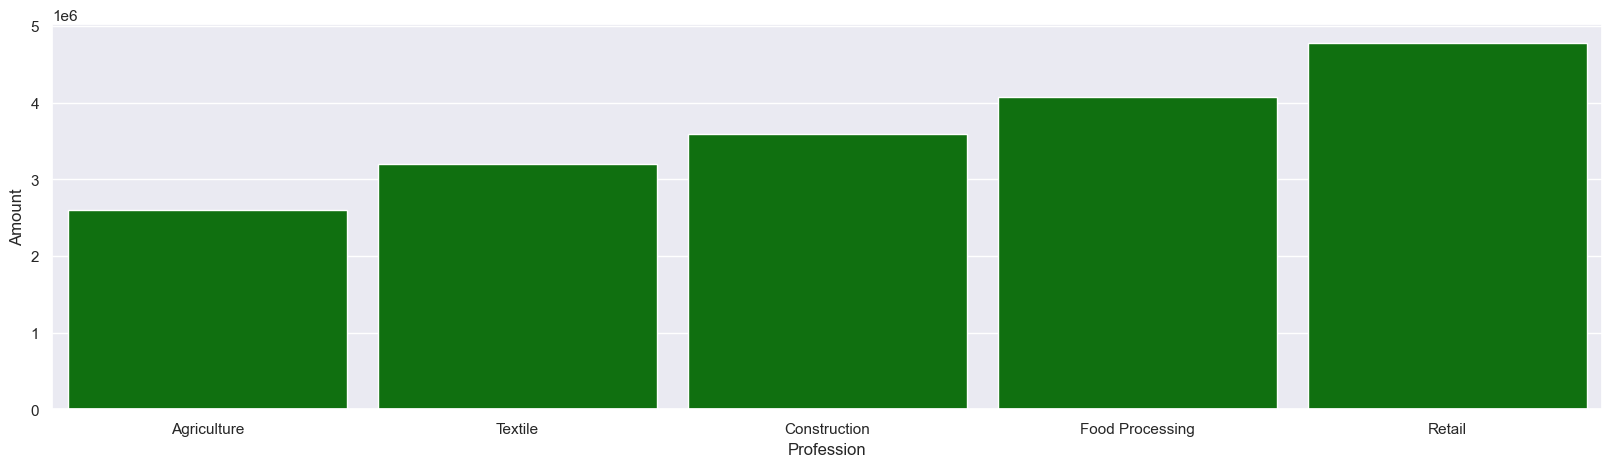

In [63]:
# Amount Wise Top Professions
sales_state = df.groupby(['Profession'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=True).head(5)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Profession',y= 'Amount',color='green',width=0.9)
plt.show()

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

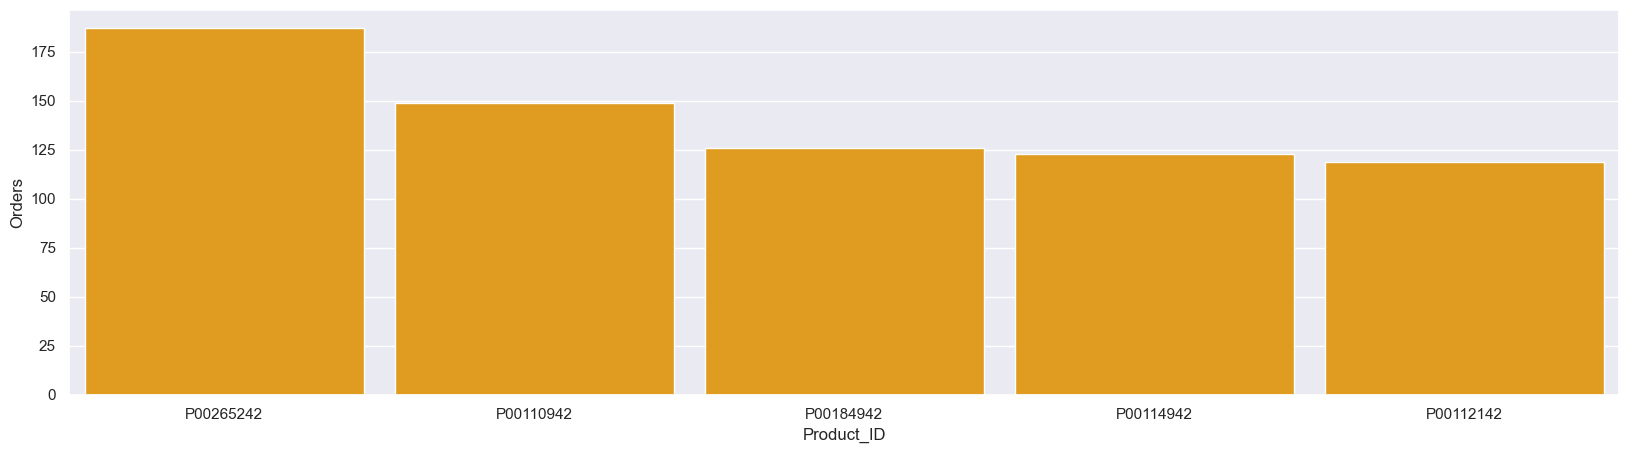

In [70]:
#Order wise Top 10 Product 
sales_state = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders',color='orange',width=0.9)
plt.show()

## Conclusion:

### *Female age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Beauty, Sports and Electronics*